<a href="https://colab.research.google.com/github/Jmmostafa/QuantRisk/blob/main/QR001_ProbabilityDistributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Long Tailed Probabilty Distributions**

|  |  |
|:---|:---|
|**Developed By** |  Md Mostafa Kamal |
|**Date** | June 3, 2025  |
|**Covered** | Fat-tailed Probability Distributions, Application |
|**Sequence** | QR001 |


---

# Introduction

The term structure of interest rates (yield curve) describes the relationship between bond yields and their maturities. Since market data is often sparse, interpolation is used to estimate yields for missing maturities.


There are several methods used to interpolate. Key methods used are:

* Linear Interpolation
* Spline Interpolation
* Cubic Spline Interpolation
* Nelson-Siegel Model
* Linear-on-Log-Discount-Factors Interpolation

# Data Collection and Wrangling

In [116]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


def data_for_analysis(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df_close = df.loc[:, ['Close']]
    df_close.columns = [ticker + '_Price']
    df_close[ticker + '_returns'] = np.log(df_close[ticker + '_Price'] / df_close[ticker + '_Price'].shift(1))
    df_close.dropna(inplace=True)
    return df_close

df = data_for_analysis('GOOG', '2020-01-01', '2025-05-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,GOOG_Price,GOOG_returns
Date,,
2020-01-03,67.075298,0.004692
2020-01-06,67.181792,0.001586
2020-01-07,69.567504,0.034895
2020-01-08,69.275872,-0.004201
2020-01-09,70.693666,0.020259


# Probabilty Distributions
Here I plotted the highly used tailed distributions for the VaR calculation and risk management purpose of the financial assets and portfolios.

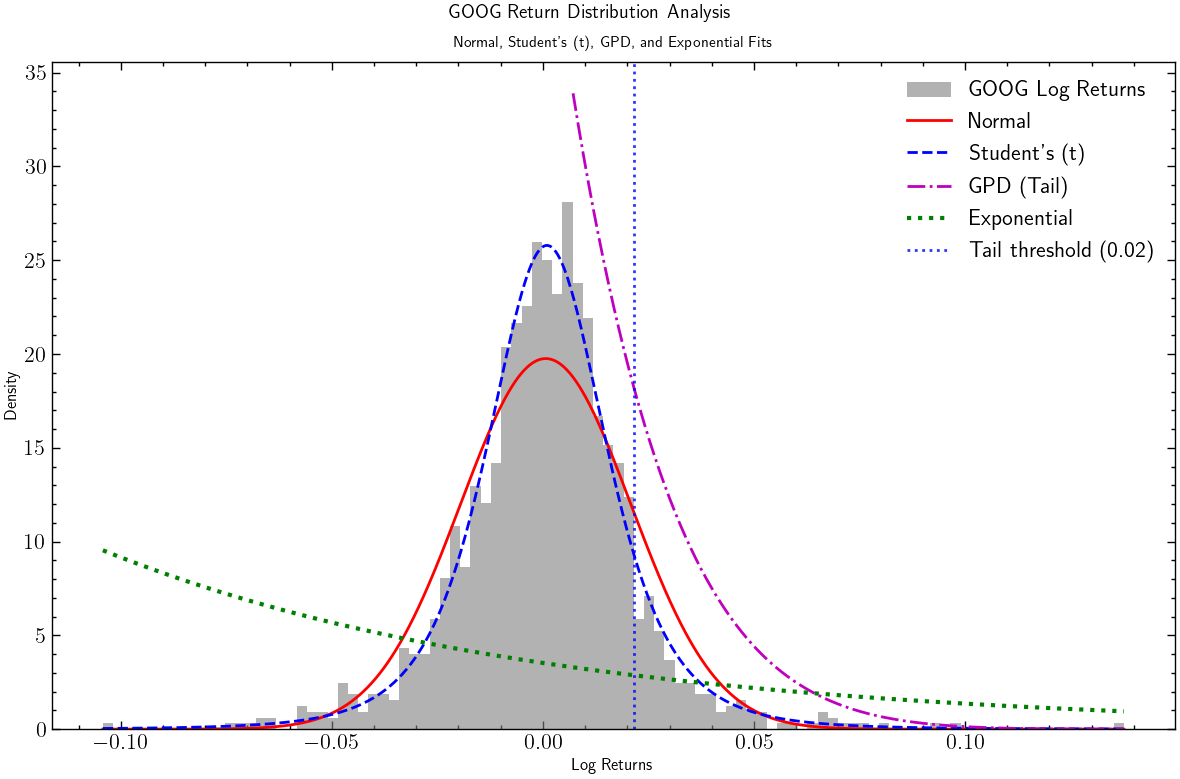

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.stats import norm, t, genpareto, expon, genextreme


def Probability_Distribution_Analysis(df,ticker):

  # Loading the required libraries
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.stats import norm, t, genpareto, expon, genextreme
  import scienceplots

  # Setting up the stage
  plt.style.use(['science', 'notebook', 'grid'])
  x = np.linspace(df[ticker +'_returns'].min(), df[ticker +'_returns'].max(), 1000)
  plt.figure(figsize=(12, 8))
  plt.rcParams['text.usetex'] = True

  # Historical returns
  plt.hist(df[ticker +'_returns'], bins=100, density=True, alpha=0.6, color='gray', label=f'{ticker} Log Returns')

  # Normal distr.
  params_norm = norm.fit(df[ticker +'_returns'])
  plt.plot(x, norm.pdf(x, *params_norm), 'r-', lw=2, label='Normal')

  # Student-t distribution
  params_t = t.fit(df[ticker +'_returns'])
  plt.plot(x, t.pdf(x, *params_t), 'b--', lw=2, label="Student's (t)")

  # GPD distribution with top 35% tail as per your quantile(0.65)
  tail_threshold = df[ticker +'_returns'].quantile(0.65)
  params_gpd = genpareto.fit(df[ticker +'_returns'][df[ticker +'_returns'] > tail_threshold], floc=0)
  plt.plot(x[x>tail_threshold], genpareto.pdf(x[x>tail_threshold], *params_gpd), 'm-.', lw=2, label='GPD (Tail)')

  # Exponential distributions
  params_exp = expon.fit(df[ticker +'_returns'])
  plt.plot(x, expon.pdf(x, *params_exp), 'g:', lw=3, label='Exponential')

  # Marking the top 10% tail
  quantile_10 = df[ticker +'_returns'].quantile(0.90)
  plt.axvline(quantile_10, color='blue', linestyle=':', alpha=0.80, label=f'Tail threshold ({quantile_10:.2f})')
  plt.suptitle(f"{ticker} Return Distribution Analysis", fontsize=14, fontweight='bold')
  plt.title("Normal, Student's (t), GPD, and Exponential Fits", fontsize=11, style='italic', pad=10)
  plt.xlabel("Log Returns", fontsize=12)
  plt.ylabel("Density", fontsize=12)
  plt.legend(frameon = False, loc='best')  # Moves legend outside plot
  plt.grid(False)
  plt.tight_layout()
  plt.show()

Probability_Distribution_Analysis(df,'GOOG')



# **References**

- Coles, S. (2001). An introduction to statistical modeling of extreme values. Springer. https://doi.org/10.1007/978-1-4471-3675-0

- Embrechts, P., Klüppelberg, C., & Mikosch, T. (1997). Modelling extremal events for insurance and finance (Vol. 33). Springer.
https://doi.org/10.1007/978-3-642-33483-2

- Johnson, N. L., Kotz, S., & Balakrishnan, N. (1994). Continuous univariate distributions (Vol. 1, 2nd ed.). Wiley.

- Student. (1908). The probable error of a mean. Biometrika, 6(1), 1–25.
https://doi.org/10.1093/biomet/6.1.1

- Gauss, C. F. (1809). Theoria motus corporum coelestium in sectionibus conicis solem ambientium. Perthes et Besser.